In [1]:
import numpy as np
#import pickle
import pickle5 as pickle
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from read_data import *

x_train, y_train, censoring_train,x_val, y_val, x_test, y_test = get_dataset("synth")
x_train = x_train[:350]
y_train = y_train[:350]
censoring_train = censoring_train[:350]

/home/fbohy/censored_active_learning/AL/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(9000, 1)
(9000,)
(9000,)
(1000, 1)
(1000,)
Censoring: 0.44155555555555553
Train: (9000, 1)
y-Train: (9000,)
Val: (250, 1)
y-Val: (250,)
Test: (500, 1)
y-test: (500,)


In [2]:
def set_size(width, fraction=1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

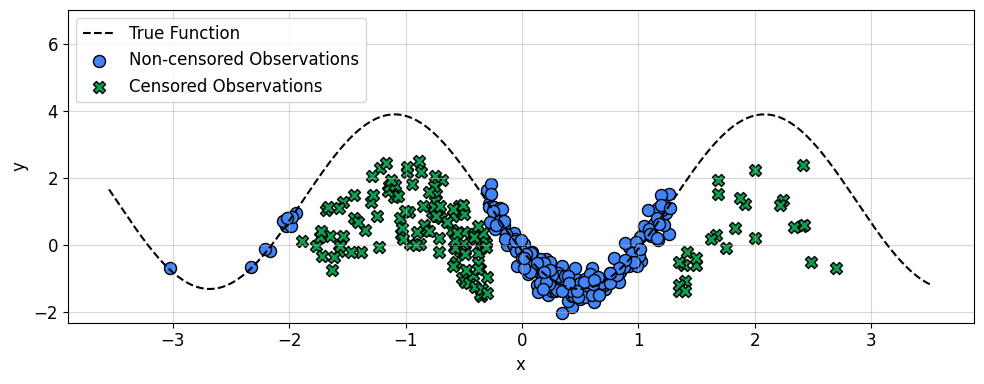

In [3]:
plt.style.use('default')
plt.rcParams.update({'font.size': 12})
width = 487.8225
#fig, ax = plt.subplots(figsize=set_size(width,1.5), frameon=False)
fig, ax = plt.subplots(figsize=(10,4), frameon=False)
plt.scatter(x_train[censoring_train == 0], y_train[censoring_train == 0],s=75, color='#4285F9', edgecolors='black', marker = 'o', label='Non-censored Observations') 
plt.scatter(x_train[censoring_train == 1], y_train[censoring_train == 1],s=75, color='#0F9D50', edgecolors='black', marker = 'X', label='Censored Observations')
plt.plot(x_test, y_test, color='black', linestyle='dashed', label='True Function')
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(None, 7)
#plot legend onto the plot
plt.legend(loc='upper left', fontsize=12)
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.savefig("1d_example_neurips.pdf")